<a href="https://colab.research.google.com/github/shubhaankargupta/image-editing-python/blob/main/opencv_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction to Image Editing with OpenCV 📸

**How does image editing work?** Each image that we take is a sample of reality displayed on our two dimensional screens. Everyday, we use apps like Instagram, Google Photos, SnapChat, etc. which allow us to amend these images.

Each image that we see is made up of small pixels on our screen. These pixels further comprise of a ratio of colors (Red, Green, and Blue simply called RGB) If this was hard to understand, you can think of it as a class (the image) which comprises of 15 sections (pixels) such that there are 3 students in each class (RGB). While editing an image, we edit the values of these pixels, or grade each and every student of this class

**What are PIL and OpenCV?**
Pillow (commonly called PIL) and OpenCV are both free, open source tools which help us to change the values of these pixels. What they do is that they go to each and every pixel in the image and change it. You can think of them as  teachers grading the students in a particular section of a class. 
Further, each of Red, Blue, Green in RGB can have any value between 0 and 255 - and combined, these values give us the final color displayed by that pixel. You can think of this as the grades each student in a class receives, such that the maximum marks in the report card are 255.

**To sum it up:** 

Teacher 🧑‍🏫 --> OpenCV and PIL

Class 🙋‍♂️🙋‍♂️🙋‍♂️ --> The image

One student 🙋‍♂️ --> The pixel

Subjects that the student has 📚📐🔬 --> RGB

Marks that the student gets (report card) 📇 --> x/255, y/255, z/255 where x, y, and z represent Red, Blue, and Green respectively and can be any integer between 0 and 255 inclusive.

**Some examples:**

White ⬜ --> White is achieved when all RGB are in full capacity (the student gets full marks in all subjects). Hence, its RGB value is 255, 255, 255

Black ⬛ --> Can you guess the value of black?

Red 🟥 --> Red will be achieved when green and blue are absent. Hence, its RGB value is 255, 0, 0.

Green 🟩 --> Similarly, Green will be achieved when Red and blue are absent. Can you guess the value of green?

Blue 🟦 --> Can you guess the value of blue?

Purple 🟪 --> Purple is a complex color which contains all the RGB values in an RGB ratio 216,191,216. However, you are not expected to memorize the codes for complex colors. Many other complex colors include yellow, orange, grey, brown, violet, cyan, dark green, sky blue etc.

While converting the image to grayscale, for example, the RGB values of a pixel change in a way so as to reach a configuration where they resemble gray.

**Why is it so important to learn image editing on Python?**
1.   It allows you to create and implement filters on your own.
2.   You can choose what filter you want to use and its strength.
3.   It is extremely fast, easy to use, and does not reduce the quality of      images
4.   It is made by you :)

**Now that we've understood how image editing works, let's implement it in real time!**


Importing all the libraries/helpers to assist us

In [ ]:
from PIL import Image, ImageOps, ImageDraw, ImageFilter, ImageEnhance
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
%matplotlib inline
from skimage.color import rgb2gray

Here, we will download the image which we want to edit. If you want to use your own image, you can upload it on drive and copy its link!



In [ ]:
!wget https://heremag-prod-app-deps-s3heremagassets-bfie27mzpk03.s3.amazonaws.com/wp-content/uploads/2020/09/11112914/la-digue-seychelles-christian-cacciamani-jPmurJKSL_0-unsplash-1200x900.jpg

--2021-07-20 07:34:56--  https://heremag-prod-app-deps-s3heremagassets-bfie27mzpk03.s3.amazonaws.com/wp-content/uploads/2020/09/11112914/la-digue-seychelles-christian-cacciamani-jPmurJKSL_0-unsplash-1200x900.jpg
Resolving heremag-prod-app-deps-s3heremagassets-bfie27mzpk03.s3.amazonaws.com (heremag-prod-app-deps-s3heremagassets-bfie27mzpk03.s3.amazonaws.com)... 52.217.131.97
Connecting to heremag-prod-app-deps-s3heremagassets-bfie27mzpk03.s3.amazonaws.com (heremag-prod-app-deps-s3heremagassets-bfie27mzpk03.s3.amazonaws.com)|52.217.131.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 262962 (257K) [image/jpeg]
Saving to: ‘la-digue-seychelles-christian-cacciamani-jPmurJKSL_0-unsplash-1200x900.jpg.1’

la-digue-seychelles 100%[===================>] 256.80K  --.-KB/s    in 0.08s   

2021-07-20 07:34:56 (3.33 MB/s) - ‘la-digue-seychelles-christian-cacciamani-jPmurJKSL_0-unsplash-1200x900.jpg.1’ saved [262962/262962]



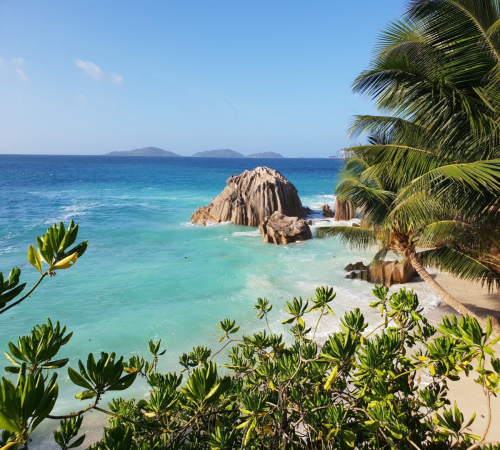

In [ ]:
imgpath = "/content/la-digue-seychelles-christian-cacciamani-jPmurJKSL_0-unsplash-1200x900.jpg"
img = cv2.imread(imgpath)

width = int(500)
height = int(450)
dim = (width, height)
  
# resize image
image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
cv2_imshow(image)

**Converting Image to Grayscale**

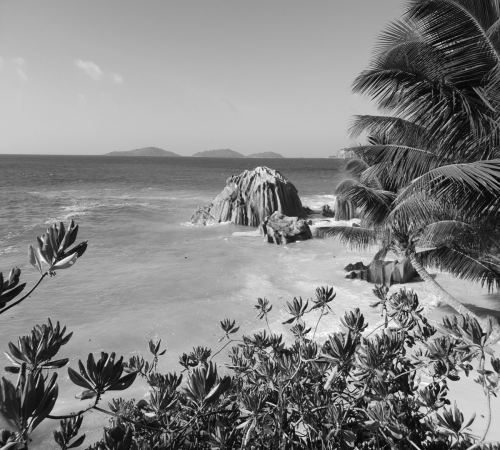

In [ ]:
grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

**Blurring Image**: Try playing around with the number '2' to increase/decrease the blur

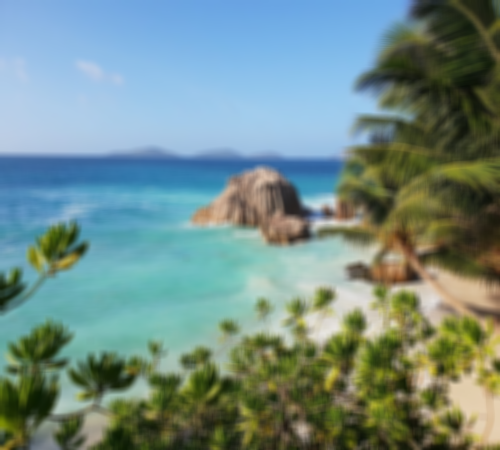

In [ ]:
blurred = cv2.blur(image,(8,8))
cv2_imshow(blurred)

**Changing brightness and contrast**: Try playing around with the number '1.6' to increase/decrease the blur

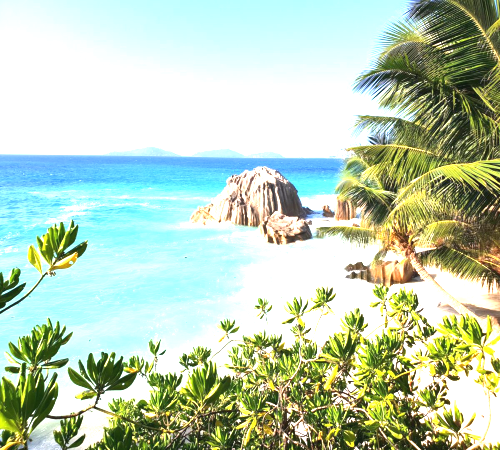

In [ ]:
alpha = 1.7 # Contrast control (1.0-3.0)
beta = 10 # Brightness control (0-100)

contrasted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
cv2_imshow(contrasted)

**Inverting color**: If you can recall, each pixel has an RGB value. By inverting this value, we are assigning each and every pixel the opposite value of it originally had.

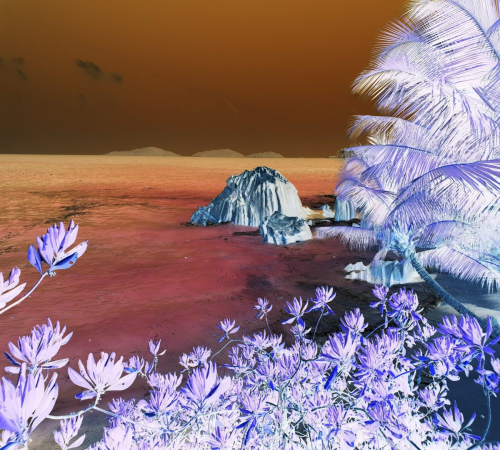

In [ ]:
inverted = cv2.bitwise_not(image)
cv2_imshow(inverted)

Can you guess what would happen if you invert the colors of an already inverted image? [Hint: Run the cell below]

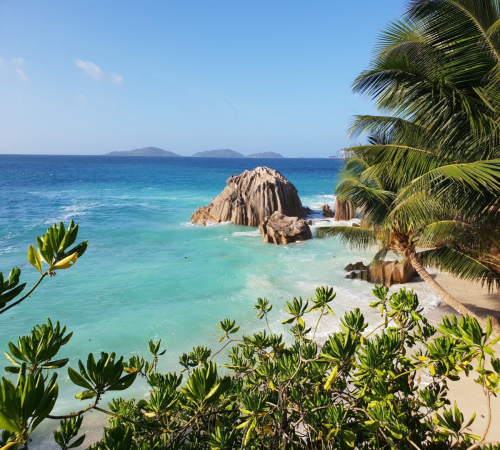

In [ ]:
guess = cv2.bitwise_not(inverted)
cv2_imshow(guess)

**Edge Highlighting and sketching**

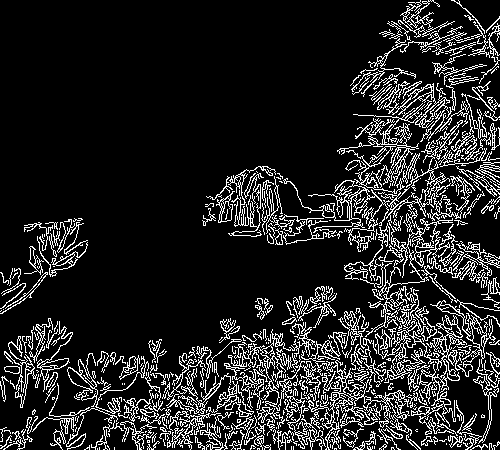

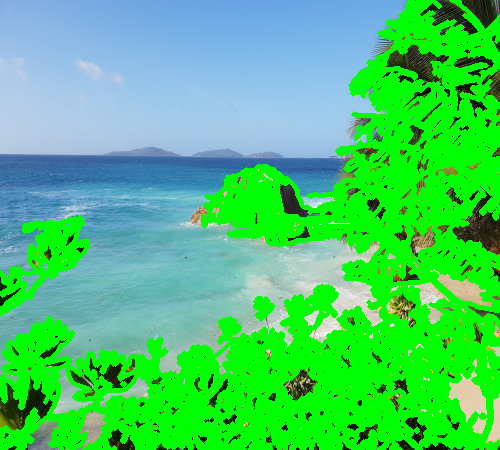

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
edged = cv2.Canny(gray, 70, 400)

contours, hierarchy = cv2.findContours(edged, 
    cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  
cv2_imshow(edged)

cv2.drawContours(image, contours, -1, (0, 255, 0), 3)
cv2_imshow(image)

**How can we give the black and white image a white background and black lines?**

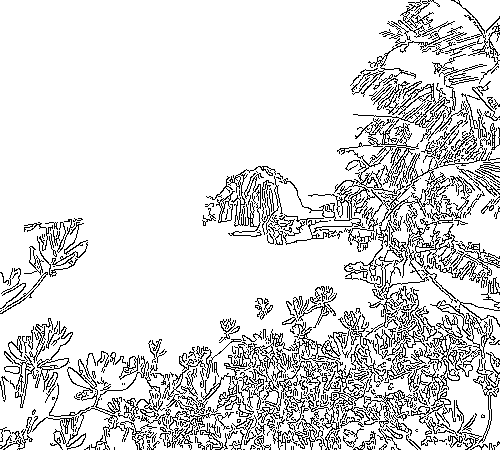

In [ ]:
img_sketch_in_white = cv2.bitwise_not(edged)
cv2_imshow(img_sketch_in_white)

**Animator:**
Convert a real image into an animation!. Here, we'll be using an example from Spiderman: Far From Home and convert it into a comical image

(-0.5, 1199.5, 899.5, -0.5)

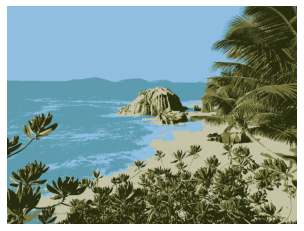

In [ ]:
from sklearn.cluster import KMeans
pic = plt.imread("/content/la-digue-seychelles-christian-cacciamani-jPmurJKSL_0-unsplash-1200x900.jpg")/255
plt.imshow(pic)
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
kmeans = KMeans(n_clusters=5, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)
plt.axis('off')

# 🎊 CONGRATS! YOU'RE A PRO NOW. 
Use the skills you have gained in this session and implement them in real life. Edit your photos using python and upload them on social media - help the people around you by editing their images. Remember- no software can produce an image of the quality you can now!